In [ ]:
import sys

In [ ]:
sys.path.append("../")

In [3]:
from dgs.data.denotation_graph import DenotationGraph, visualize_denotation_graph

In [4]:
help(DenotationGraph)

Help on class DenotationGraph in module dgs.data.denotation_graph:

class DenotationGraph(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, graph:Union[networkx.classes.digraph.DiGraph, NoneType]=None, graph_folder_path:Union[str, NoneType]=None) -> None
 |      Creates a DenotationGraph python object from the files generated by the Java code in https://github.com/aylai/DenotationGraph
 |      Uses the networkx.DiGraph() to create the Directed Graph which can be accessed via the attribute 'graph'
 |      
 |      Arguments:
 |          graph (nx.DiGraph): Either a prebuilt nx.DiGraph, Default None
 |          graph_folder_path (str): path to the 'graph' folder created by the above java code, Default None
 |      
 |          Supply either of the above
 |  
 |  get_ancestors(self, node_idx:int) -> set
 |  
 |  get_children_nodes(self, node_idx:int) -> List[int]
 |  
 |  get_cousin_nodes(self, node_idx:int) -> Dict[int, List[int]]
 |      Finds the cousin nodes
 |      


In [5]:
dg = DenotationGraph(graph_folder_path="../../../flicker30k_denotation_graph/flicker30k/graph")

ℹ Reading node.idx file
ℹ Reading node-cap.map file
ℹ Reading node-img.map file
ℹ Reading the node-tree.txt file


Finding leaf nodes...: 100%|██████████| 2642009/2642009 [00:09<00:00, 291275.17it/s]


In [6]:
len(dg.leaf_nodes)

621175

In [7]:
len(dg.nodes)

2642009

In [8]:
len(dg.edges)

7986054

In [9]:
dg.get_node_info(0).keys()

dict_keys(['text', 'images', 'captions'])

In [10]:
dg.get_node_info(0)["text"]

'person'

In [11]:
len(dg.get_node_info(0)["images"])

29909

In [12]:
dg.get_edge_info((0,54))

{'edge_type': 'SENT',
 'rewrite_rules': ['3735771637.jpg#3#9',
  '823498977.jpg#3#8',
  '1499554025.jpg#1#26',
  '3215847501.jpg#0#11',
  '2371173787.jpg#3#4',
  '3215870337.jpg#0#15']}

In [13]:
dg.leaf_nodes[0]

6322

In [14]:
# there are a few leaf nodes which are not the full  captions too. Not sure why though!
dg.get_node_info(dg.leaf_nodes[0])["text"]

'variety of snack'

In [15]:
# There are also a few leaf nodes which contains the full captions
print(dg.leaf_nodes[-1])
print(dg.get_node_info(dg.leaf_nodes[-1]))

2642008
{'text': 'man on moor blue and white boat with hill and mist in background', 'images': ['998845445.jpg'], 'captions': ['998845445.jpg#4']}


In [16]:
dg.get_in_edges(dg.leaf_nodes[0])

[(1105, 6322), (125, 6322)]

In [17]:
# This should be an empty list as leaf does not have any children
dg.get_children_nodes(dg.leaf_nodes[0])

[]

In [18]:
dg.get_parent_nodes(dg.leaf_nodes[0])

[1105, 125]

In [19]:
assert dg.leaf_nodes[0] in dg.get_children_nodes(1105)

In [20]:
len(dg.get_children_nodes(1105))

112

In [21]:
assert len(dg.get_children_nodes(1105)) == len(dg.get_out_edges(1105))

In [22]:
len(dg.get_descendents(0))

2002974

In [23]:
len(dg.get_ancestors(dg.leaf_nodes[0]))

2

In [24]:
# find the sibling nodes
siblings = dg.get_sibling_nodes(5635)

In [25]:
list(dg.get_parent_nodes(5635))

[1105, 14]

In [26]:
len(siblings)

2

In [27]:
assert 5635 not in siblings[1105]

In [28]:
assert 5635 not in siblings[14]

In [29]:
cousins = dg.get_cousin_nodes(dg.leaf_nodes[-1])

In [30]:
len(cousins)

45477

In [31]:
dg.edges[-1]

(2641999, 2641998)

In [32]:
def get_immediate_in_out_edges(node_idx, graph):
    edges = graph.get_in_edges(node_idx)
    edges.extend(graph.get_out_edges(node_idx))
    return edges

In [33]:
# find all the incomming and outgoing  edges for a random node.
# useful for visualization
edges= get_immediate_in_out_edges(7996, dg)

In [34]:
len(edges)

628

In [35]:
subgraph = dg.get_subgraph_from_edges(edges[:10])  # create a subgraph from a random subset of 10 edges

Finding leaf nodes...: 100%|██████████| 11/11 [00:00<00:00, 3159.44it/s]


In [36]:
len(subgraph.edges)

10

In [37]:
visualize_denotation_graph(subgraph, "./subgraph.png")

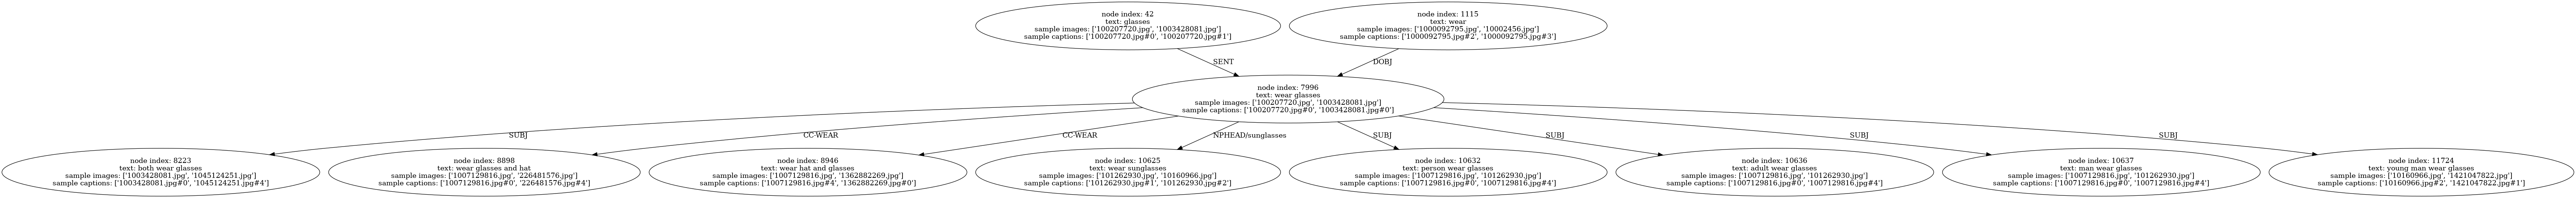

In [38]:
from IPython import display
display.Image(filename="./subgraph.png")